**[LeetCode Link](https://leetcode-cn.com/problems/the-skyline-problem/solution/218tian-ji-xian-wen-ti-sao-miao-xian-fa-by-ivan_al/)**

## 扫描线法
使用扫描线，从左至右扫过。如果遇到左端点，将高度入堆，如果遇到右端点，则将高度从堆中删除。使用 last 变量记录上一个转折点。
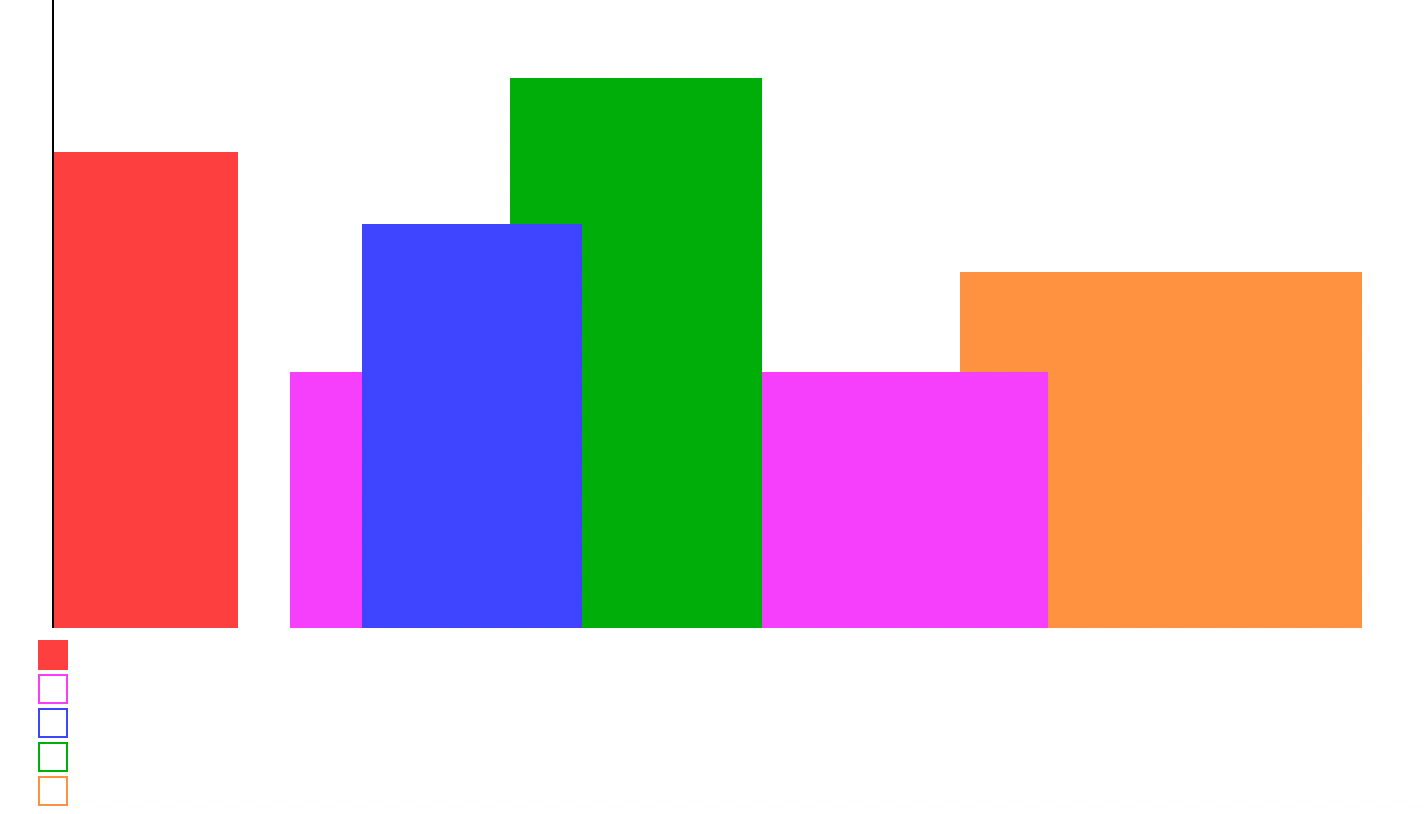

> * 对points遍历时，首先会取出横坐标小的点。如果2个点横坐标相等，会先取出 second 小的点，对于负数来说，其实就是高度更高的建筑。也就是说，两个点上有高度不同的建筑，会先取高的出来放入高度集合，集合中高度最大值和之前高度不同，就直接放入结果。后面更低高度的建筑加入并不会改变最大高度。
* 如果second为正，表示建筑物在此处结束，需要把相应高度从高度集合中删除。有相同建筑同时在此结束，则会先让较低的建筑离开，因为它们不会改变最大高度。只有当最高的建筑物离开时，才进行改变。
* 如果一个位置既有建筑物进来，又有建筑物离开，会先选择进来的，同理。 总结起来，我就是想说，这里把建筑物起始点的高度设为负数，真的很巧妙。

In [ ]:
import heapq
class Solution:
    def getSkyline(self, buildings: List[List[int]]) -> List[List[int]]:
        #思路：最大堆，每次在判断关键点的时候，移除所有右端点≤当前点的堆顶。
        if not buildings:return []
        points = []
        heap = [[0, float('inf')]]
        res = [[0, 0]]# [0.0]是为了使最后一个点也为关键点

        #1.将所有端点加入到点集中(每个建筑物的左右端点)
        for l, r, h in buildings:
            points.append((l, -h, r)) #这里负号将最小堆，变成了最大堆
            points.append((r, h, 0)) #r的右端点为0

        #2.将端点从小到大排序
        points.sort() #如果当前点相等，则按照高度升序

        #3.遍历每一个点，分别判断出堆、入堆、添加关键点操作。
        for l, h, r in points:
            while l >= heap[0][1]: #出堆：保证当前堆顶为去除之前建筑物右端点的最大值。
                heapq.heappop(heap)
            if h < 0: #入堆：所有左端点都要入堆
                heapq.heappush(heap, [h, r])
            if res[-1][1] != -heap[0][0]: #关键点：必然是左端点，堆顶，因此需要加负号
                res.append([l, -heap[0][0]])
        return res[1:]